In [104]:
# Import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords 


In [105]:
# Downloads
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/jonnybegreat/test-repo/master/twitter_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/jonnybegreat/test-repo/master/twitter_test.csv')

In [107]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [108]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [109]:
df['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [110]:

# Create a function to clean the tweets

def cleanTxt(text):
  
  
  text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) # Removing '#' hash tag
  text = re.sub('RT[\s]+', '', text) # Removing RT
  text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
  text = re.sub(':', '', text) # Removing ':'
  text = text.lower()
  text = word_tokenize(text)
  
  return text


# Clean the tweets
df['message'] = df['message'].apply(cleanTxt)
test_df['message'] = test_df['message'].apply(cleanTxt)
# Show the cleaned tweets
df

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, does, n't, think, c...",625221
1,1,"[it, 's, not, like, we, lack, evidence, of, an...",126103
2,2,"[researchers, say, we, have, three, years, to,...",698562
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736
4,1,"[it, 's, 2016, ,, and, a, racist, ,, sexist, ,...",466954
...,...,...,...
15814,1,"[they, took, down, the, material, on, global, ...",22001
15815,2,"[how, climate, change, could, be, breaking, up...",17856
15816,0,"[notiven, rt, nytimesworld, what, does, trump,...",384248
15817,-1,"[8smiles, hey, liberals, the, climate, change,...",819732


In [111]:
X = df['message'].astype(str)
y = df['sentiment']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=1)

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [114]:
# Different Models
LogReg = LogisticRegression()
LinSVC = LinearSVC()
NB = MultinomialNB()
onevrest = OneVsRestClassifier(LinearSVC(),n_jobs=4)

In [115]:
# Create Pipeline
text_clf = Pipeline([('tfidf',TfidfVectorizer(
                             min_df=3, 
                             max_df=0.7,strip_accents='unicode',
                             analyzer='word',
                             ngram_range=(1, 3))),('clf',LinSVC)])

In [116]:
text_clf.fit(X_train,y_train) #fits this pipeline using the training data


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.7, max_features=None,
                                 min_df=3, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents='unicode',
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
          

In [117]:
# Predict
predictions = text_clf.predict(X_test)

In [118]:
# Metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn import metrics
print(classification_report(y_test,predictions))
print(f"Accuracy score : {accuracy_score(y_test,predictions)}")
print(f"f1 score : {f1_score(y_test,predictions,average='weighted')}")

              precision    recall  f1-score   support

          -1       0.64      0.52      0.57       106
           0       0.58      0.35      0.44       237
           1       0.77      0.87      0.82       874
           2       0.76      0.78      0.77       365

    accuracy                           0.75      1582
   macro avg       0.69      0.63      0.65      1582
weighted avg       0.73      0.75      0.73      1582

Accuracy score : 0.7452591656131479
f1 score : 0.7325298523667692


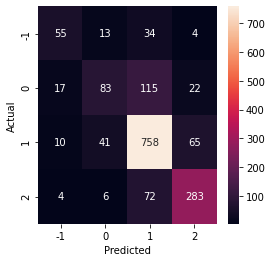

In [119]:
# look at Confustion Matrix in more detail
import matplotlib.pyplot as plt
conf_mat = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['-1','0','1','2'], yticklabels=['-1','0','1','2'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [120]:
kaggle_predictions = text_clf.predict(test_df["message"].astype(str))

In [121]:
kaggle_df = pd.DataFrame(
    {'tweetid': test_df['tweetid'],
     'sentiment': kaggle_predictions
    })

In [122]:
kaggle_df.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,0
4,872928,2


In [123]:
kaggle_df.to_csv("sentiment_17.csv",index=False)